## <font color='darkblue'>**Analyzing Regional Differences in Medical Costs and Personal Attributes**
#### Mariwan Ibrahim

## Introduction

#### Background
Medical costs in the United States have been rising steadily, placing a significant financial burden on individuals and families. Understanding the factors that influence these costs is crucial for policymakers, healthcare providers, and insurers. One important aspect to consider is the regional variation in medical expenses, as healthcare costs can vary widely across different areas due to factors such as local healthcare practices, cost of living, and regional health trends.  

#### Importance of Regional Analysis
Analyzing regional variations in medical costs can provide valuable insights into how geography interacts with personal attributes to influence healthcare expenses. By identifying the key drivers of medical costs in different regions, stakeholders can develop targeted interventions to manage and reduce these expenses.

#### Objective
The objective of this study is to examine the impact of personal attributes (age, sex, BMI, number of children, smoking status) on medical insurance charges across different regions in the United States. Specifically, we aim to:

1. Identify the personal attributes that significantly affect medical costs.
2. Analyze how these effects vary across different geographical regions.
3. Provide recommendations based on our findings to help manage medical costs more effectively.

This study will utilize the Medical Cost Personal [Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download), which include detailed information on individual medical insurance costs and various personal attributes.



## Data Description
The Medical Cost Personal Dataset includes `age` (age of primary beneficiary), `sex` (insurance contractor gender, female, male), `BMI` (Body mass index, providing an understanding of whether the individual is underweight, normal weight, overweight, or obese), `childern` (Number of children/dependents covered by the insurance), `smoker` (Whether the individual smokes), `region` (the beneficiary's residential area in the US, northeast, southeast, southwest, northwest) and `charges` (Individual medical costs billed by health insurance), which is the target variable.  
The medical cost personal dataset will be loaded using pandas library.

In [1]:
# Importing pandas library
import pandas as pd

# Reading dataset
df = pd.read_csv('C:/Users/Mariwan/Desktop/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Understanding the Data
- `Age:` This variable helps in understanding how medical costs vary with age.
- `Sex:` Gender can influence medical costs due to differing health needs and risks.
- `BMI:` This variable indicates the individual's weight category, which can impact health insurance charges due to associated health risks.
- `Children:` More dependents might mean higher medical costs.
- `Smoker:` Smoking status is a significant risk factor and usually leads to higher medical costs.
- `Region:` Geographic location can affect medical costs due to varying healthcare practices and cost of living.
- `Charges:` This is the target variable representing the medical insurance cost charged to the individual.

By analyzing this dataset, one can uncover patterns and relationships between personal attributes and medical costs, and how these relationships vary across different regions.


In [2]:
# Checking null values in dataset
df.isnull().sum().reset_index().rename(columns = {'index':'variables', 0:'Null values'})

,variables,Null values
0,age,0
1,sex,0
2,bmi,0
3,children,0
4,smoker,0
5,region,0
6,charges,0


The above table indicates that the dataset has no null values

In [3]:
# Checking duplicates in dataset
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


The dataset has a duplicated value as seen above table. This duplicated value will be dropped.

In [4]:
# Removing duplicates
df.drop_duplicates(inplace = True)

# Double checking duplicates
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges


In [5]:
# Checking data types
df.dtypes.reset_index().rename(columns = {'index':'variables', 0:'data types'})

,variables,data types
0,age,int64
1,sex,object
2,bmi,float64
3,children,int64
4,smoker,object
5,region,object
6,charges,float64


The dataset is clean and complete, with all variables properly defined. It's ready for detailed analysis to explore factors influencing healthcare costs effectively.

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical initial step in analyzing any dataset. It involves examining and visualizing data to understand its main characteristics, uncover patterns, spot anomalies, and test hypotheses.

### 1. Summary Statistics
I will start by calculating basic statistics to get an overview of the numerical variables like age, BMI, children, and charges.


In [6]:
# Summary Statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The average age of individuals in the dataset is approximately 39.22 years. The youngest individual is 18 years old, while the oldest is 64 years old. The age varies around the mean by approximately 14.04 years on average.<br>  
The average BMI in the dataset is around 30.66 and BMI ranges from a minimum of 15.96 to a maximum of 53.13. BMI values deviate from the mean by approximately 6.10 units on average.<br>  
The dataset includes individuals with a minimum of 0 children and a maximum of 5 children. On average, individuals have 1 children covered by the insurance.<br>  
The average medical insurance charge (Charges) for individuals in the dataset is approximately 13,279.12. Charges range from a minimum of 1,121.87 to a maximum of 63,770.43. Charges vary around the mean by approximately 12,110.36 on average.

### 2. Data Visualization
Visualize distributions, relationships between variables, and potential outliers using plots such as histograms, scatter plots, and box plots. Three Python libraries will be used to visualize the dataset such as `matplotlib`, `seaborn` and `altair`.

In [7]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sb
import altair as alt

Let's first check the distributions of sex, childern, smoker and region.

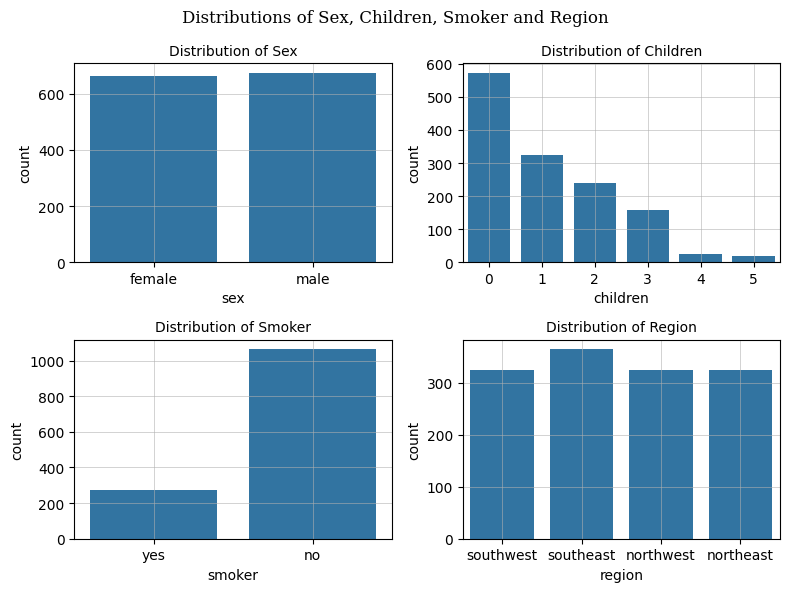

In [8]:
# Size of plot
plt.figure(figsize = (8, 6), layout = 'tight')

# Bar plot for sex
plt.subplot(2, 2, 1)
sb.countplot(df, x = 'sex')
plt.title('Distribution of Sex', size = 10)
plt.grid(linewidth = 0.4)

# Bar plot for children
plt.subplot(2, 2, 2)
sb.countplot(df, x = 'children')
plt.title('Distribution of Children', size = 10)
plt.grid(linewidth = 0.4)

# Bar plot for smoker
plt.subplot(2, 2, 3)
sb.countplot(df, x = 'smoker')
plt.title('Distribution of Smoker', size = 10)
plt.grid(linewidth = 0.4)

# Bar plot for region
plt.subplot(2, 2, 4)
sb.countplot(df, x = 'region')
plt.title('Distribution of Region', size = 10)
plt.grid(linewidth = 0.4)

plt.suptitle('Distributions of Sex, Children, Smoker and Region', font = 'Serif')
plt.show()

The bar plots indicate that the dataset has an equal number of observations for males and females, as well as an equal number of instances for each geographic region (southwest, southeast, northwest, northeast), it implies a very balanced dataset across both gender and geographic variables.  

The smoker box plot indicates a significant imbalance between smokers and non-smokers, with many instances classified as non-smokers and only a few instances classified as smokers. This imbalance could impact analyses related to healthcare costs, as smokers typically have higher healthcare expenses due to increased risks of smoking-related diseases. Similarly, there is an imbalance in the number of individuals with children. Most individuals in the dataset have either no children or one child, which may skew analyses related to healthcare utilization and costs associated with dependent care.

The charge is the target variable and let's take a look at it's distribution.

In [9]:
# Creating histogram for charges
alt.Chart(df, width = 500, height = 300).mark_bar(opacity = 0.7, fill = 'orange').encode(
    x = alt.X('charges:Q', bin=alt.Bin(maxbins=50), title = 'Charges'),
    y = alt.Y('count()', title = 'Frequency')
).properties(title = 'Charges Distribution').interactive()

alt.Chart(...)

The histogram plot displays that samples of charges in dataset are normally distributed and skewed to left (mean is lower than median), that means most individuals in the dataset likely have lower medical charges, while a smaller number of individuals may have significantly higher charges.

It is important to calculate the average charges for each categorical variable as this helps in gaining insights into the dataset.

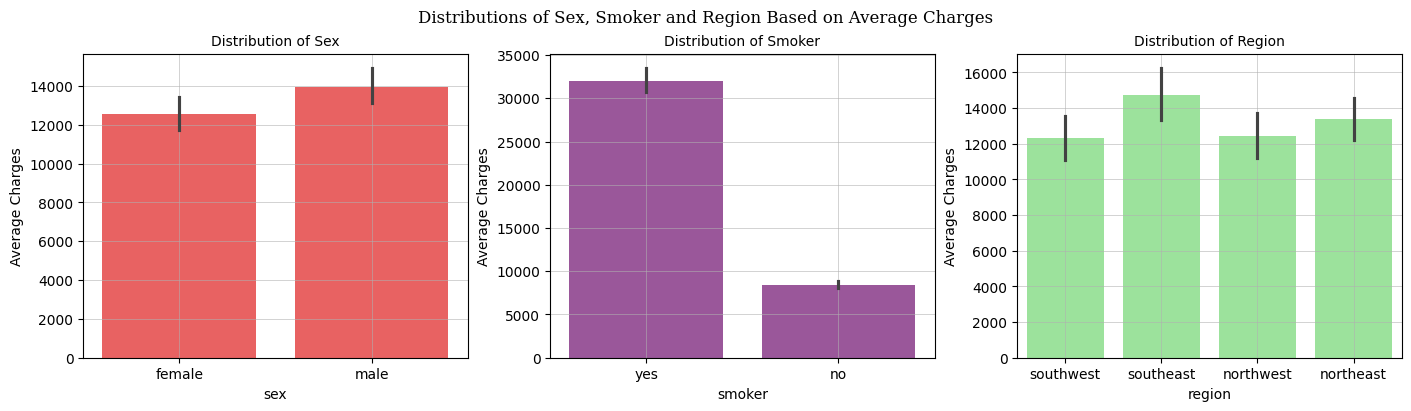

In [10]:
# Size of plot
plt.figure(figsize = (14, 4), layout = 'compressed')

# Bar plot for sex
plt.subplot(1, 3, 1)
sb.barplot(df, x = 'sex', y = 'charges', estimator = 'mean', color = 'red', alpha = 0.7)
plt.title('Distribution of Sex', size = 10)
plt.ylabel('Average Charges')
plt.grid(linewidth = 0.4)

# Bar plot for smoker
plt.subplot(1, 3, 2)
sb.barplot(df, x = 'smoker', y = 'charges', estimator = 'mean', color = 'purple', alpha = 0.7)
plt.title('Distribution of Smoker', size = 10)
plt.ylabel('Average Charges')
plt.grid(linewidth = 0.4)

# Bar plot for region
plt.subplot(1, 3, 3)
sb.barplot(df, x = 'region', y = 'charges', estimator = 'mean', color = 'lightgreen')
plt.title('Distribution of Region', size = 10)
plt.ylabel('Average Charges')
plt.grid(linewidth = 0.4)

plt.suptitle('Distributions of Sex, Smoker and Region Based on Average Charges', font = 'Serif')
plt.show()

Bar plots based on average charges show that males have higher average charges compared to females. Additionally, individuals living in the southeast region tend to have higher charges than those in other areas, with similar trends observed in the northeast.  

It appears that smokers have significantly higher average charges compared to non-smokers. This could be attributed to the fact that there are fewer samples of smokers in the dataset, and those individuals with higher medical charges disproportionately influence the average. 

In [11]:
# Using altair to make scatter plot
alt.Chart(df, width = 500, height = 300).mark_circle().encode(
    x = alt.X('age:Q'),
    y = alt.Y('charges:Q')
).properties(title = 'Age vs Charges').interactive()

alt.Chart(...)

Age and medical charges show a positive relationship in the dataset, meaning that as age increases, so do the medical charges go up.

In [12]:
# Using altair to make scatter plot
alt.Chart(df, width = 500, height = 300).mark_circle().encode(
    x = alt.X('bmi:Q'),
    y = alt.Y('charges:Q')
).properties(title = 'Age vs Charges').interactive()

alt.Chart(...)

Additionally, BMI has a positive relationship with medical charges, indicating that individuals with higher BMI tend to face higher medical expenses. This suggests that as BMI increases, so do the associated healthcare costs, likely due to the increased risk of conditions such as cardiovascular diseases, diabetes, and other obesity-related health issues. Understanding this relationship is important for healthcare providers and policymakers to develop targeted interventions aimed at managing and reducing healthcare costs linked to higher BMI levels.

### 3. Correlation Ananlysis
I will compute correlations between numerical variables to identify strong relationships and potential multicollinearity.

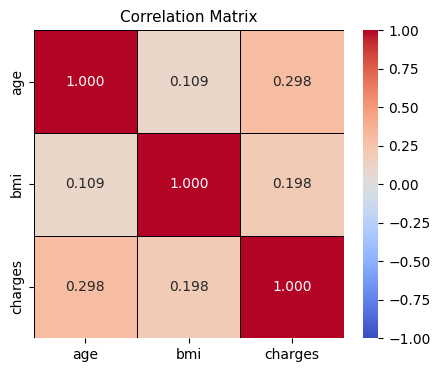

In [13]:
# Finding correlation
cor = df[['age', 'bmi', 'charges']].corr()

# Visualizing correlation matrix
plt.figure(figsize = (5, 4))
sb.heatmap(cor, vmin = -1, vmax = 1, annot = True, fmt = '.3f', linewidths = 0.6, linecolor = 'black', cmap = 'coolwarm')
plt.title('Correlation Matrix', size = 11)
plt.show()

According to the correlation matrix, age has a weak positive correlation with medical charges, indicating that as individuals get older, their medical charges slightly increase. Similarly, BMI also has a weak positive correlation with medical charges, meaning that as BMI increases, medical charges steadily go up. Additionally, the independent variables age and BMI have a weak correlation with each other, which helps avoid multicollinearity issues in the analysis.

### 4. Hypothesis Testing
I will perform a statistical test, specifically `ANOVA` (Analysis of Variance), to compare the average medical charges across different geographical areas. This test will help determine if there are statistically significant differences in average charges among the regions (southwest, southeast, northwest, northeast).

In [14]:
# Importing scipy stats library
from scipy.stats import f_oneway

# Preparing charges dataset for each region 
southwest = df.loc[df['region'] == 'southwest']['charges']
southeast = df.loc[df['region'] == 'southeast']['charges']
northwest = df.loc[df['region'] == 'northwest']['charges']
northeast = df.loc[df['region'] == 'northeast']['charges']

# Oneway ANOVA 
anova = f_oneway(southwest, southeast, northwest, northeast)
print(f'F-statistic: {anova.statistic}\nP-value: {anova.pvalue}\n')

# Finding mean for each region
means = df.groupby('region')['charges'].mean().reset_index().rename(columns = {'charges':'Average charges'})
means

F-statistic: 2.926139903662776
P-value: 0.03276288025444947



,region,Average charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


The p-value from the ANOVA test is statistically significant (less than 0.05), which leads us to reject the null hypothesis. This indicates that the mean medical charges for each region (southwest, southeast, northwest, and northeast) are different from one another.

To further investigate which specific regions have different mean charges, we will carry out the Tukey HSD (Honestly Significant Difference) test. This post-hoc analysis will help identify which pairs of regions have significantly different mean charges and which pairs have similar mean charges.


In [15]:
# Importing scipy library
from scipy.stats import tukey_hsd

# Tukey HSD
comp = tukey_hsd(southwest, southeast, northwest, northeast)
print(comp)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  -2388.474     0.048 -4760.691   -16.257
 (0 - 2)   -103.903     1.000 -2544.216  2336.409
 (0 - 3)  -1059.447     0.679 -3499.759  1380.865
 (1 - 0)   2388.474     0.048    16.257  4760.691
 (1 - 2)   2284.571     0.064   -89.580  4658.721
 (1 - 3)   1329.027     0.475 -1045.124  3703.178
 (2 - 0)    103.903     1.000 -2336.409  2544.216
 (2 - 1)  -2284.571     0.064 -4658.721    89.580
 (2 - 3)   -955.544     0.746 -3397.735  1486.648
 (3 - 0)   1059.447     0.679 -1380.865  3499.759
 (3 - 1)  -1329.027     0.475 -3703.178  1045.124
 (3 - 2)    955.544     0.746 -1486.648  3397.735



Based on the results of the Tukey HSD (Honestly Significant Difference) test, we have determined that the mean medical charges for the southwest and southeast regions are not significantly different from each other, indicating that these two regions have similar average medical charges. However, for all other pairs of regions, the test reveals significant differences in their mean charges. This means that the average medical charges in the northwest and northeast regions differ significantly from those in the southwest and southeast, as well as from each other.

## Ordinary Least Squares
I will apply linear regression model on the dataset and examine the relationship between independent variables (age, sex, BMI, children, smoker and region) and dependent variable (charges). The goal is to understand how changes in the independent variables are associated with changes in the dependent variable.<br>  

To prepare the dataset for linear regression analysis, categorical variables such as sex and smoker will be converted into binary numeric format. For sex, categories (e.g., male, female) will be replaced with 0 and 1. Similarly, for smoker, categories (e.g., non-smoker, smoker) will also be replaced with 0 and 1.  

Regarding the region variable, which is nominal with multiple categories (e.g., southwest, southeast, northwest, northeast), dummy variables will be created. Each category will have its own binary indicator variable (e.g., southwest represented by 1 or 0), ensuring all categories are appropriately captured without introducing unnecessary ordinality in the dataset.

In [16]:
# Coverting sex to numeric
df['sex'] = df['sex'].replace({'male':0, 'female':1})

# Converting smoker to numeric
df['smoker'] = df['smoker'].replace({'no':0, 'yes':1})

# Region dummy variables
data = pd.get_dummies(df, columns = ['region'], dtype = int)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [17]:
# Preparinf x and y for linear model
import statsmodels.api as sm
xx = data.drop(columns = ['charges'])

x = sm.add_constant(xx)
y = data['charges']

# Ordinary least squares
model = sm.OLS(y, x).fit()

# Print the result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:58:28   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.012e+04    792.082  

- The R-squared value of 0.751 indicates that approximately 75.1% of the variance in medical charges is explained by the independent variables included in the model.
- Significant Predictors: Age, BMI, smoker status, and geographic region (northeast, northwest, southeast, southwest) all show statistically significant associations with medical charges.
- Non-Significant Predictor: Sex does not significantly influence medical charges (p = 0.698), suggesting it may not be a strong predictor in this model.
- Geographic Effects: Individuals from different regions (northeast, northwest, southeast, southwest) exhibit varying impacts on medical charges, with the southeast showing the highest incremental effect.

## Conclusion
The regression results provide valuable insights into the factors influencing medical charges. Based on the regression analysis of medical costs, the following personal attributes significantly affect charges:  

- Age: Each year increase in age is associated with an increase in medical charges by 256.76, indicating older individuals tend to have higher healthcare costs.

- BMI (Body Mass Index): Higher BMI is linked with higher medical charges, with each unit increase in BMI correlating with a 339.25 rise in costs.

- Number of Children: Having children increases medical charges by 474.82 per child, highlighting the financial impact of family size on healthcare expenses.

- Smoking Status: Smokers incur significantly higher costs, with smokers paying on average $23,850 more compared to non-smokers, underscoring the health and economic burden of smoking.

- Geographic Region: Differences across regions are evident:
    1. Northeast: Associated with a decrease of 1,944.29 in charges compared to the reference region.
    2. Northwest: Linked with a decrease of 2,293.52.
    3. Southeast: Linked with the highest increase in charges, with an increment of 2,979.56.
    4. Southwest: Also associated with higher charges, with an increase of 2,904.37.

`Southeast Region:` Individuals in the Southeast experience significantly higher medical charges compared to other regions. Factors contributing to this disparity could include higher healthcare costs, different healthcare utilization patterns, or regional variations in health status.  

`Northeast and Northwest Regions:` These regions exhibit lower medical charges compared to the reference region (Southwest). Understanding the reasons behind these cost differences could inform strategies for cost containment and healthcare management.  

**Recommendations**  
- `Promote Healthy Behaviors:` Focus on reducing smoking rates and promoting healthy BMI to lower healthcare costs uniformly across regions.
- `Tailor Regional Strategies:` Develop cost management strategies specific to each region's healthcare utilization patterns and cost drivers.
- `Expand Telehealth Services:` Increase access to telehealth to provide cost-effective healthcare options, especially in areas with higher medical costs.

